# ILI Macro Visual
-------------------
<div>Developer: Gabriel Salinas</div> 
<div>Contributor: Garey Salinas</div>

## Import libraries

In [150]:
%matplotlib inline
import csv 
#lets try and read the data using pandas instead of csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import List, Tuple, Dict, Optional
import warnings
#print(mpl.matplotlib_fname())

### Configure look and feel of notebook

In [151]:
mpl.rcParams['font.family'] = 'sans-serif'
sns.set_style("darkgrid")
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [152]:
filename = 'run_sheet.csv'
data = pd.read_csv(filename)                     
df = data.copy()
df.head()

,Odometer (ft),Feature Number,Feature Description,Max Depth(%),YPin
0,-11.12,1,Start Launcher,0.0,2
1,-7.70,3,Tap,0.0,2
2,-6.40,5,Tap,0.0,2
3,-3.30,7,Valve,0.0,2
4,-3.30,9,Tee,0.0,2


In [153]:
df.tail()

,Odometer (ft),Feature Number,Feature Description,Max Depth(%),YPin
510,31242.0,1021,Girth Weld,0.0,2
511,31288.0,1023,Girth Weld,0.0,2
512,31333.0,1025,Girth Weld,0.0,2
513,31382.0,1027,Girth Weld,0.0,2
514,31433.0,1029,Girth Weld,0.0,2


In [154]:
df.shape

(515, 5)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Odometer (ft)        515 non-null    float64
 1   Feature Number       515 non-null    int64  
 2   Feature Description  515 non-null    object 
 3   Max Depth(%)         515 non-null    float64
 4   YPin                 515 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 20.2+ KB


In [156]:
df.describe(include='all')

,Odometer (ft),Feature Number,Feature Description,Max Depth(%),YPin
count,515.000000,515.000000,515,515.000000,515.0
unique,NaN,NaN,18,NaN,NaN
top,NaN,NaN,Girth Weld,NaN,NaN
freq,NaN,NaN,460,NaN,NaN
mean,18830.726505,515.000000,NaN,1.835146,2.0
std,8485.017501,297.623924,NaN,9.791048,0.0
min,-11.120000,1.000000,NaN,0.000000,2.0
25%,13767.000000,258.000000,NaN,0.000000,2.0
50%,19646.000000,515.000000,NaN,0.000000,2.0
75%,25773.500000,772.000000,NaN,0.000000,2.0


**Observations**
- Looking at the "count" row for each column, there are 515 observations for each feature.
- The 'Odometer' column has a negative value. Check for more negative values.
- Most of 'Odometer' sample data is in the upper quantile.
- 'Feature Number' values range from 1 to just over 1000. most of the population lives in the upper quantile.
- 'Max Depth' has zero missing data and a mean close to zero. The standard deviation is greater than the mean.
- 'Max Depth' values are highly dispered, ranging from 0 to 80. 
- All of 'YPin' values are 2. We can think about dropping this column and create a single variable. 
- Since 'Description' shows to have 18 unique values. We can change the dtype to category.
- There seems to be no missing data in all the columns.

### Lets change the column headers to make it easier on us

In [157]:
df.columns = ['Odometer', 'Number', 'Description', 'Depth', 'Ypin'] #we can change back later if need to
df.columns

Index(['Odometer', 'Number', 'Description', 'Depth', 'Ypin'], dtype='object')

In [158]:
df.dtypes

Odometer       float64
Number           int64
Description     object
Depth          float64
Ypin             int64
dtype: object

In [159]:
df.Description.value_counts()

Girth Weld             460
Metal Loss Anomaly      22
Tap                      6
Tee                      4
Valve                    4
Flange                   3
AGM                      3
Bend Left                2
Deformation Anomaly      2
Bend Down                1
Casing End               1
Sleeve End               1
Bend Right               1
Magnet                   1
Start Launcher           1
Casing Begin             1
Area Launcher            1
Sleeve Begin             1
Name: Description, dtype: int64

In [160]:
unique_values = len(df.Description.unique())
print(f"There are {unique_values} in the Description column")

There are 18 in the Description column


**Since there are 18 unique values, lets make the into categorical column**


In [161]:
df['Description'] = df.Description.astype('category')

## Lets explore the features. First the numerical types.

In [162]:
df.skew()

Odometer   -0.666532
Number      0.000000
Depth       5.874907
Ypin        0.000000
dtype: float64

- Odometer has a negative skew.
- Depth has a positive skew.
- Feature number and Ypin dont have a skew with falls in line with a dispersion noted earlier.

In [163]:
def histogram_boxplot(feature, figsize=(10,5), bins=None):
    """Boxplot and histogram combined"""
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') 
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) 
    # Add mean and median to the histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-')

### Odometer

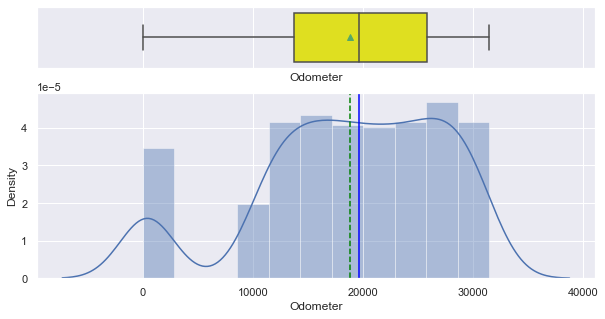

In [164]:
histogram_boxplot(df.Odometer)

Lets check to see how many values are less than zero.

In [165]:
print(f"There are {len(df.Odometer)} number of values in the Odometer column.")
print(f"There are {len(df[df.Odometer < 0])} below zero in the Odometer column")
df[df.Odometer < 0]

There are 515 number of values in the Odometer column.
There are 7 below zero in the Odometer column


,Odometer,Number,Description,Depth,Ypin
0,-11.12,1,Start Launcher,0.0,2
1,-7.70,3,Tap,0.0,2
2,-6.40,5,Tap,0.0,2
3,-3.30,7,Valve,0.0,2
4,-3.30,9,Tee,0.0,2
5,-3.00,11,Tap,0.0,2
6,-1.80,13,Flange,0.0,2


In [166]:
print(f"There are {len(df.Odometer)} number of values in the Odometer column.")

There are 515 number of values in the Odometer column.


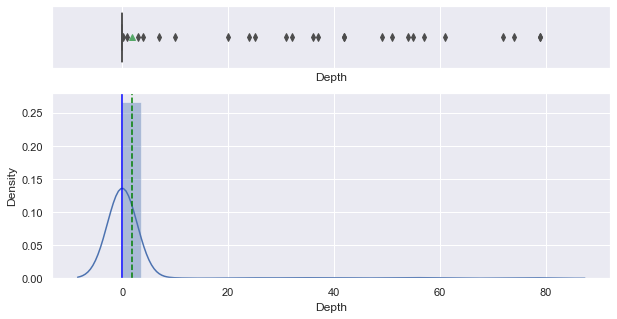

In [167]:
histogram_boxplot(df.Depth)

### Explore the categorical variables

In [168]:
# Function to create barplots that indicate percentage for each category.
def bar_percentage(plot, feature):
    '''
    Barplot with percentage
    plot: 
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        perc = 100*(p.get_height() / total)
        percentage_annotate = f"{perc:.1f}%"
        x = p.get_x() + (p.get_width() / 2) - 0.275
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage_annotate, (x, y), size=11) 

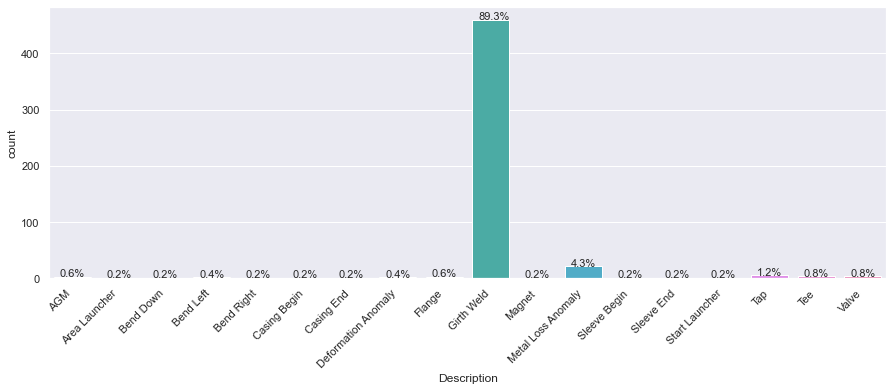

In [169]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df.Description);
bar_percentage(ax, df.Description)
plt.xticks(rotation=45, ha='right');

## Lets try a more traditional approach using csv.reader

In [170]:
with open(filename,'r') as csv_fh: 
    csv_reader = csv.reader(csv_fh)                               
    arr_data = np.array([row for row in csv_reader])             # put each row from csv.reader into np.arra
    labels = arr[0,:]                                            # Create dict using labels as column names.
    data = {label: arr[1:, i] for i, label in enumerate(labels)} # sliced vertical to create homogenous structure   

In [171]:
def check_dtype(data: Dict):
    '''Print the values dtype of each key'''
    for k, v in data.items():
        print(k, v.dtype)

In [172]:
# Lets change the dtype for the colomns
data['Odometer (ft)'] = data['Odometer (ft)'].astype(float)
data['Feature Number'] = data['Feature Number'].astype(int)
data['Feature Description'] = data['Feature Description'].astype(str)
data['Max Depth(%)'] = data['Max Depth(%)'].astype(float)
data['YPin'] = data['YPin'].astype(int)

In [173]:
check_dtype(data) # Lets check the dtype

Odometer (ft) float64
Feature Number int32
Feature Description <U19
Max Depth(%) float64
YPin int32


In [215]:
#create a list of feature descriptions to pass to function to print out count()
def print_descriptions(data, features): # features is an ndarray
    '''Prints the count of each feature in data.'''
    for feature in features:
        num = np.sum(data == feature)
        print(f"There are {num} {feature.upper()} in this section of the pipeline.")

In [216]:
features = np.unique(data['Feature Description'])

In [217]:
print_descriptions(data['Feature Description'], features)

There are 3 AGM in this section of the pipeline.
There are 1 AREA LAUNCHER in this section of the pipeline.
There are 1 BEND DOWN in this section of the pipeline.
There are 2 BEND LEFT in this section of the pipeline.
There are 1 BEND RIGHT in this section of the pipeline.
There are 1 CASING BEGIN in this section of the pipeline.
There are 1 CASING END in this section of the pipeline.
There are 2 DEFORMATION ANOMALY in this section of the pipeline.
There are 3 FLANGE in this section of the pipeline.
There are 460 GIRTH WELD in this section of the pipeline.
There are 1 MAGNET in this section of the pipeline.
There are 22 METAL LOSS ANOMALY in this section of the pipeline.
There are 1 SLEEVE BEGIN in this section of the pipeline.
There are 1 SLEEVE END in this section of the pipeline.
There are 1 START LAUNCHER in this section of the pipeline.
There are 6 TAP in this section of the pipeline.
There are 4 TEE in this section of the pipeline.
There are 4 VALVE in this section of the pipelin

In [218]:
# create a list of list to zip with our labels (headers)
# labels = [label0, label1, label2, .....]
# values = [[value0], [value1], [value2], .....]
#values = [odometers, numbers, descriptions, depths, ypins] # list were created 
#ili_dict = dict(zip(labels, values))
#for k, v in ili_dict.items():
#    print(k, ":", v, end="\n")

In [219]:
# Cool way to find unique values in set. A set has only unique values
#features = list(set([value for value in ili_dict['Feature Description']])) 
#features

In [220]:
#pass the list just generated into the print_features function to printout the feature count.

TypeError: print_descriptions() missing 1 required positional argument: 'features'

In [214]:
plt.figure(dpi=128, figsize=(15,5))
plt.scatter(weld,weld_pipe,s=5000,color='grey',marker='|')
plt.scatter(anomaly,anomaly_data,s=45,color='lightcoral',marker='*')
plt.scatter(tap,tap_pipe,s=100,color='turquoise',marker='o')
plt.scatter(tap,tap_pipe,s=100,color='darkblue',marker='+')
plt.scatter(tee,tee_pipe,s=200,color='limegreen',marker='o')
plt.scatter(tee,tee_pipe,s=200,color='darkblue',marker='+')
plt.scatter(sleeve,sleeve_pipe,s=6000,color='red',marker='|')
plt.scatter(sleeve,sleeve_pipe,s=3000,color='crimson',marker='|')
plt.scatter(flange,flange_pipe,s=2200,color='gold',marker='|')
plt.scatter(agm,agm_data,s=200,color='red',marker='o')
plt.scatter(agm,agm_data,s=150,color='navy',marker='P')
plt.scatter(agm,agm_data,s=100,color='w',marker='+')
plt.scatter(casing,casing_pipe,s=9000,color='indigo',marker='|')
plt.scatter(valve,valve_pipe,s=100,color='lightsteelblue',marker='X')
plt.scatter(valve,valve_pipe,s=1000,color='blue',marker='x')
plt.scatter(lbend,lbend_pipe,s=100,color='blue',marker='<')
plt.scatter(rbend,rbend_pipe,s=100,color='blue',marker='>')
plt.scatter(ubend,ubend_pipe,s=100,color='blue',marker='^')
plt.scatter(dbend,dbend_pipe,s=100,color='blue',marker='v')
plt.scatter(deform,deform_pipe,s=500,color='green',marker='*')

#set chart title and label axes.
plt.title("ILI Macro Visual", fontsize=26)
plt.xlabel("Odometer Readings (ft)",fontsize=20)
#plt.ylabel("Pipeline Depth of Cover",fontsize=20)

plt.tick_params(labelleft='off')
plt.axis([-277,1000, -5,5])

plt.show()

NameError: name 'weld' is not defined

<Figure size 1920x640 with 0 Axes>

output_file = 'conditions_r_met.csv'

     with open(output_file,'w',newline='') as csv_out:

    = csv.writer(csv_out)
        labels = next(file_reader)
        file_writer.writerow(labels)
        print("Column Header Index:")
        
        for i, label in enumerate(labels):
            print(index, label)
            
        
        for row in reader:
            odometers = float(row[x])
            feature_number = int(row[fn])
            description = str(row[fd])
            depth_percent = float(row[mdp])
            y_axis = int(row[ya])
            run_data = row[:]
        
            ili_data.append(run_data)
            
            #insert up index description in row[7]
            descript_data.append(row)
            descript.append(odometers)
            descript_y.append(y_axis)
            descript_descript.append(description)

            def feature_setup(feature,feature_odo,feature_data,feature_pipe):
                if description == feature:
                    feature_odo.append(odometers)
                    feature_pipe.append(y_axis)
                    feature_data.append(row)
                    writer.writerow(row)

            feature_setup('Tap',tap,tap_data,tap_pipe)

            feature_setup('Tee',tee,tee_data,tee_pipe)

            feature_setup('Valve',valve,valve_data,valve_pipe)

            feature_setup('Girth Weld',weld,weld_data,weld_pipe)

            feature_setup('Sleeve Begin',sleeve,sleeve_data,sleeve_pipe)
            feature_setup('Sleeve End ',sleeve,sleeve_data,sleeve_pipe)

            feature_setup('Flange',flange,flange_data,flange_pipe)

            feature_setup('Magnet',magnet,magnet_data,magnet_pipe)

            feature_setup('Casing End',casing,casing_data,casing_pipe)
            feature_setup('Casing Begin',casing,casing_data,casing_pipe)

            feature_setup('Area Launcher',trap,trap_data,trap_pipe)
            feature_setup('Start Launcher',trap,trap_data,trap_pipe)

            feature_setup('Deformation Anomaly',deform,deform_data,deform_pipe)
            
            feature_setup('AGM',agm,agm_label,agm_data)
            
            feature_setup('Metal Loss Anomaly',anomaly,anomaly_pipe,anomaly_data)
            
            feature_setup('Bend Left',lbend,lbend_data,lbend_pipe)
            feature_setup('Bend Right',rbend,rbend_data,rbend_pipe)
            feature_setup('Bend up',ubend,ubend_data,ubend_pipe)
            feature_setup('Bend down',dbend,dbend_data,dbend_pipe)
            